# Preprocessing Data
## Dealing with missing values

In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
dupes = data.duplicated()
sum(dupes)

13

In [4]:
data = data.drop_duplicates()

In [5]:
dupes = data.duplicated()
sum(dupes)

0

In [7]:
pd.DataFrame({'value': data['Number'], 'Missing?' : data['Number'].isnull()})

,value,Missing?
0,123456.0,False
1,54321.0,False
2,87654.0,False
3,3456.0,False
4,7654.0,False
5,NaN,True
6,87654.0,False
7,6789.0,False
8,NaN,True
9,4567.0,False


### Non-standard missing values

In [9]:
pd.DataFrame({'value': data["Shape Reported"], 'Missing?' : data['Shape Reported'].isnull()})

,value,Missing?
0,TRIANGLE,False
1,NaN,True
2,OVAL,False
3,DISK,False
4,LIGHT,False
5,NaN,True
6,CIRCLE,False
7,DISK,False
8,12,False
9,CYLINDER,False


### Unexpected missing values

In [10]:
pd.DataFrame({'value':data['State'], 'Missing?' : data['State'].isnull()})

,value,Missing?
0,NY,False
1,NJ,False
2,CO,False
3,KS,False
4,NY,False
5,N,False
6,CA,False
7,MI,False
8,AK,False
9,NaN,True


In [12]:
# number of missing values in each attribute
pd.DataFrame(data.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Number,3
City,0
Colors Reported,9
Shape Reported,2
State,1
Time,0


### Any missing values?

In [13]:
data.isnull().values.any()

True

### Total missing values

In [15]:
data.isnull().sum().sum()

15

### Replacing missing values

In [21]:
data['Number'].head(10)

0    123456.0
1     54321.0
2     87654.0
3      3456.0
4      7654.0
5         NaN
6     87654.0
7      6789.0
8         NaN
9      4567.0
Name: Number, dtype: float64

In [22]:
data['Number'].fillna(12345, inplace=True)
data['Number'].head(10)

0    123456.0
1     54321.0
2     87654.0
3      3456.0
4      7654.0
5     12345.0
6     87654.0
7      6789.0
8     12345.0
9      4567.0
Name: Number, dtype: float64

### Dropping rows with missing values

In [23]:
data.isnull().sum()

Number             0
City               0
Colors Reported    9
Shape Reported     2
State              1
Time               0
dtype: int64

In [24]:
data.dropna(inplace=True)
data.isnull().sum()

Number             0
City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

In [25]:
data

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


### Dealing with incorrect/unwanted observations

In [27]:
data.tail()

,Number,City,Colors Reported,Shape Reported,State,Time
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


In [29]:
data.shape

(7, 6)

In [31]:
data_filtered = data[data['Colors Reported'] != '*****']
data_filtered

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00


In [34]:
data_filtered2 = data.drop(data[data['Shape Reported'] == '@'].index, inplace=False)
data_filtered2

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


## Dealing with outliers

In [44]:
from sklearn.datasets import load_boston
import seaborn as sns
from scipy import stats
import numpy as np

In [39]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [40]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Discover outliers with visualization tools

#### Box plot

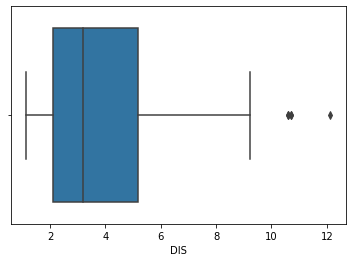

In [42]:
sns.boxplot(x=boston_df['DIS']);

#### Scatter plot

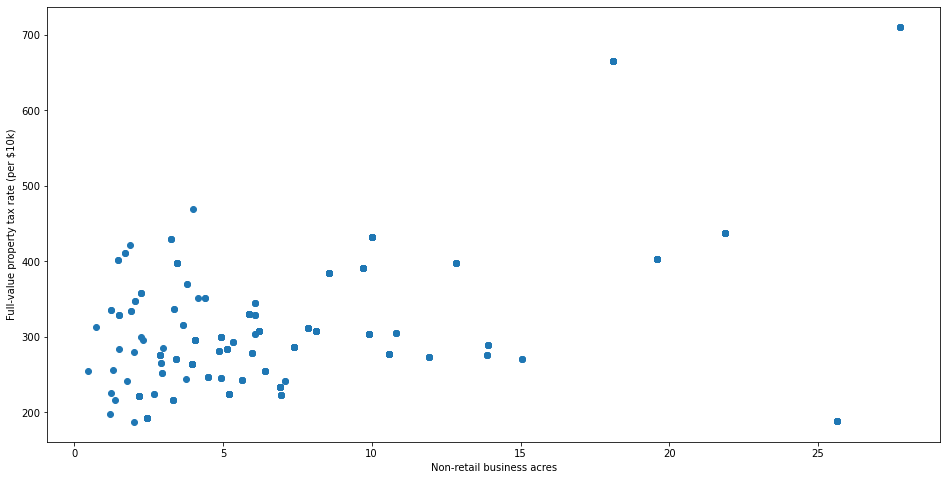

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Non-retail business acres')
ax.set_ylabel('Full-value property tax rate (per $10k)')
plt.show();

### Discover outliers with statistical rules
#### Z-Score

In [45]:
z = np.abs(stats.zscore(boston_df))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [46]:
threshold = 3
np.where(z>threshold)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

In [47]:
print(z[55][1])

3.375038763517309


#### IQR

In [49]:
Q1 = boston_df.quantile(.25)
Q3 = boston_df.quantile(.75)
IQR = Q3 - Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [50]:
np.where((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR)))

(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152, 152, 153,
        154, 154, 155, 155, 156, 160, 160, 162, 162, 163, 163, 165, 166,
        167, 168, 169, 170, 180, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        203, 203, 204, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
        221, 222, 224, 225, 226, 232, 233, 234, 236, 253, 254, 255, 256,
        257, 257, 258, 259, 260, 261, 262, 262, 263, 264, 265, 266, 267,
        267, 268, 269, 273, 274, 274, 275, 276, 276, 277, 277, 278, 280,
        282, 283, 283, 283, 284, 285, 286, 286, 287, 288, 289, 290, 291,
        292, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332,
        341, 343, 344, 347, 348, 349, 350, 351, 351, 352, 352, 353, 353,
        354, 354, 355, 355, 356, 357, 358, 363, 364, 364, 365, 366, 367,
        367, 367, 369, 370, 371, 372, 373, 373, 374

### Correcting and removing outliers
#### Z-Score

In [52]:
# Select rows without a single outlier
bdf1 = boston_df[(z<3).all(axis=1)]
bdf1.shape, boston_df.shape

((415, 13), (506, 13))

In [53]:
bdf2 = boston_df.copy() # Copy the df

# Replace outliers with median values
# We will ignore any new outliers that this creates (since it will change the IQR)

for i, j in zip(np.where(z>threshold)[0], np.where(z>threshold)[1]):
    bdf2.iloc[i,j] = boston_df.iloc[:,j].median()

In [54]:
z = np.abs(stats.zscore(bdf2))

np.where(z>threshold)

C:\Users\pcopley\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
<ipython-input-54-07109181fd60>:3: RuntimeWarning: invalid value encountered in greater
  np.where(z>threshold)


(array([ 39,  40,  54,  65,  66, 145, 146, 155, 156, 163, 195, 196, 197,
        198, 224, 232, 233, 253, 254, 255, 267, 286, 290, 291, 292, 298,
        299, 300, 348, 354, 355, 367, 374, 375, 378, 384, 384, 386, 387,
        400, 403, 406, 409, 412, 413, 413, 414, 415, 417, 417, 428, 430,
        432, 433, 434, 435, 438, 440], dtype=int64),
 array([ 1,  1,  1,  1,  1, 11, 11, 11, 11,  5,  1,  1,  1,  1,  5,  5,  5,
         5,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  0,  0,
         0,  0,  5,  0,  0,  0,  0,  0, 11,  0,  0, 11, 11,  0,  0, 11, 11,
        11, 11, 11, 11, 11, 12,  0], dtype=int64))

#### IQR

In [56]:
bdf3 = boston_df[~((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR))).any(axis=1)]
bdf3.shape

(274, 13)

In [57]:
bdf4 = boston_df.copy()

# Replace every outlier on the lower side with the lower whisker value
for i,j in zip(np.where(bdf4<Q1-1.5*IQR)[0], np.where(bdf4<Q1-1.5*IQR)[1]):
    w=Q1-1.5*IQR
    bdf4.iloc[i,j] = w[j]

# Replace every outlier on the upper side with the upper whisker value
for i,j in zip(np.where(bdf4>Q3+1.5*IQR)[0], np.where(bdf4>Q3+1.5*IQR)[1]):
    w=Q3+1.5*IQR
    bdf4.iloc[i,j] = w[j]

bdf4.shape, boston_df.shape

((506, 13), (506, 13))